In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/AAPL.csv')

In [5]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
df1 = df.reset_index()['close']

In [7]:
df1.shape

(1258,)

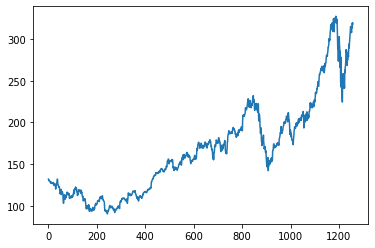

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [11]:
total_size = int(len(df1))
training_size = int(total_size*0.7)
test_size = int(total_size - training_size)

In [12]:
training_size,test_size

(880, 378)

In [13]:
train_data = df1[0:training_size]
test_data = df1[training_size:total_size]

In [14]:
def create_dataset(df,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(df)-time_step-1):
    x = df[i:(i+time_step),:]
    dataX.append(x)
    dataY.append(df[i+time_step])
  return np.array(dataX), np.array(dataY)

In [15]:
time_step  = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [16]:
x_train.shape, y_train.shape

((779, 100, 1), (779, 1))

In [17]:
x_test.shape, y_test.shape

((277, 100, 1), (277, 1))

In [18]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
pip install tensorflow

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences= True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=50, batch_size=64)

Epoch 1/50
13/13 [==============================] - 2s 178ms/step - loss: 6.4695e-04 - val_loss: 0.0057
Epoch 2/50
13/13 [==============================] - 2s 179ms/step - loss: 5.8634e-04 - val_loss: 0.0044
Epoch 3/50
13/13 [==============================] - 3s 267ms/step - loss: 5.5791e-04 - val_loss: 0.0045
Epoch 4/50
13/13 [==============================] - 4s 320ms/step - loss: 5.4282e-04 - val_loss: 0.0055
Epoch 5/50
13/13 [==============================] - 4s 275ms/step - loss: 6.2699e-04 - val_loss: 0.0036
Epoch 6/50
13/13 [==============================] - 2s 176ms/step - loss: 6.0177e-04 - val_loss: 0.0036
Epoch 7/50
13/13 [==============================] - 2s 177ms/step - loss: 5.1162e-04 - val_loss: 0.0055
Epoch 8/50
13/13 [==============================] - 2s 177ms/step - loss: 5.4464e-04 - val_loss: 0.0037
Epoch 9/50
13/13 [==============================] - 2s 178ms/step - loss: 4.9674e-04 - val_loss: 0.0030
Epoch 10/50
13/13 [==============================] - 2s 178ms/st

In [27]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
train_predict[0:5]

array([[110.1543 ],
       [110.31022],
       [110.46039],
       [110.69765],
       [111.02687]], dtype=float32)

In [32]:
train_predict.shape, test_predict.shape

((779, 1), (277, 1))

In [38]:
look_back = 100
train_predict_plot = np.empty_like(df1)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]= train_predict
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

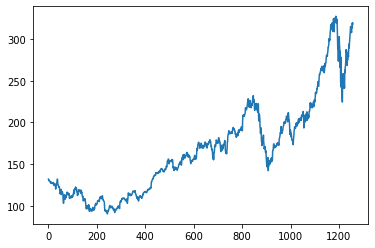

In [39]:
plt.plot(scaler.inverse_transform(df1))

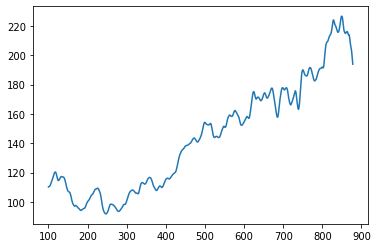

In [41]:
plt.plot(train_predict_plot)


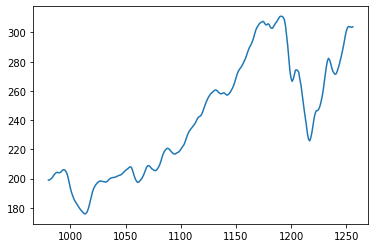

In [43]:
plt.plot(test_predict_plot)

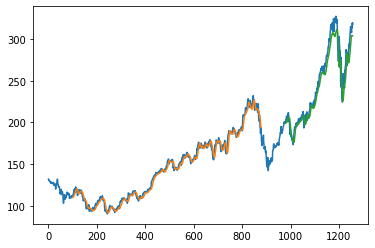

In [46]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()


In [82]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [98]:
test_data.shape

(378, 1)

In [99]:
x_input = test_data[278:].reshape(1,-1)

In [100]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [101]:
x_input.shape

(1, 100)

In [102]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [103]:
lst_output = []
n=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    x_input= x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n, 1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1



  else:
    x_input = x_input.reshape((1,n,1))
    yhat = model.predict(x_input)
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i=i+1



In [104]:
print(lst_output)

[[0.9069734811782837], [0.9037553668022156], [0.8949054479598999], [0.8819503784179688], [0.8662907481193542], [0.8489423990249634], [0.8305668830871582], [0.8115809559822083], [0.7922623753547668], [0.7728188633918762], [0.753425657749176], [0.7342439889907837], [0.7154245972633362], [0.6971083283424377], [0.6794233918190002], [0.6624823808670044], [0.646381139755249], [0.631195068359375], [0.6169819831848145], [0.6037786602973938], [0.5916036367416382], [0.5804573893547058], [0.5703235864639282], [0.5611726641654968], [0.5529622435569763], [0.5456403493881226], [0.5391474366188049], [0.5334187150001526], [0.5283857583999634], [0.5239788889884949]]


In [105]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [106]:
len(df1)

1258

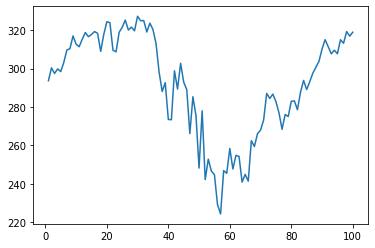

In [107]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))

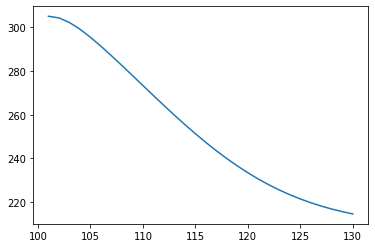

In [108]:
plt.plot(day_pred, scaler.inverse_transform(lst_output))

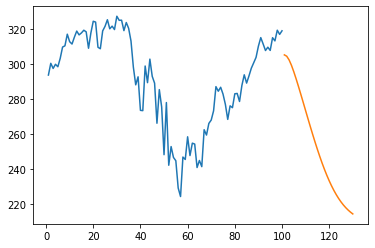

In [109]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [112]:
df_new = df1.tolist()
df_new.extend(lst_output)
df_new = scaler.inverse_transform(df_new).tolist()

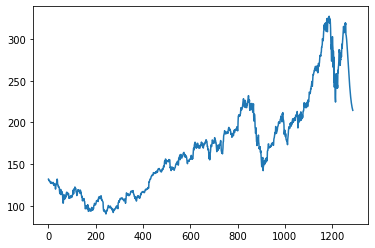

In [113]:
plt.plot(df_new)